<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/insurance_claims_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claim Analysis: Demographic and Health

1.PROBLEM STATEMENT
:Identify how data is clustered to rectify the insurance claims across different age groups

Problem type:Clustering

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier

In [400]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data.xlsx to insurance_data (7).xlsx


In [401]:
import pandas as pd
df = pd.read_excel("insurance_data.xlsx")
df.head()

,index,patient_id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.13,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,31.13,87,No,0,No,southeast,1131.51
2,2,3,19.0,male,33.30,82,Yes,0,No,southeast,1135.94
3,3,4,28.0,male,33.70,80,No,0,No,northwest,1136.40
4,4,5,23.0,male,34.10,100,No,0,No,northwest,1137.01


In [402]:
df.shape

(1340, 11)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   patient_id     1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1340 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [404]:
df.describe()

,index,patient_id,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.032836,30.395828,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.110369,6.293592,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.000000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,37.000000,30.000000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [405]:
df.isnull().sum()

,0
index,0
patient_id,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [406]:
# Investigate the elements in each feature
for column in df:
  unique_values = np.unique(df[column].astype(str))  # Indented properly
  nr_values = len(unique_values)  # Indented properly
  if len(unique_values) <= 10:
    print("The number of values for feature '{}' is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("The number of values for feature '{}' is: {}".format(column, nr_values))

The number of values for feature 'index' is: 1340
The number of values for feature 'patient_id' is: 1340
The number of values for feature 'age' is: 43
The number of values for feature 'gender' is: 2.....['female' 'male']
The number of values for feature 'bmi' is: 157
The number of values for feature 'bloodpressure' is: 61
The number of values for feature 'diabetic' is: 2.....['No' 'Yes']
The number of values for feature 'children' is: 6.....['0' '1' '2' '3' '4' '5']
The number of values for feature 'smoker' is: 2.....['No' 'Yes']
The number of values for feature 'region' is: 4.....['northeast' 'northwest' 'southeast' 'southwest']
The number of values for feature 'claim' is: 1337


List of Categorical & Numeric columns

In [407]:
numerical_columns=df.select_dtypes(include="number").columns.to_list()
categorical_columns=df.select_dtypes(exclude="number").columns.to_list()
print(f"numerical columns in the data: {numerical_columns}")
print(f"categorical columns in the data:{categorical_columns}")

numerical columns in the data: ['index', 'patient_id', 'age', 'bmi', 'bloodpressure', 'children', 'claim']
categorical columns in the data:['gender', 'diabetic', 'smoker', 'region']


In [408]:
#value counts of gender
df['gender'].value_counts()

,count
gender,
male,678
female,662


In [409]:
#value counts of diabetic
df['diabetic'].value_counts()

,count
diabetic,
No,698
Yes,642


In [410]:
#value counts of smoker
df['smoker'].value_counts()

,count
smoker,
No,1066
Yes,274


In [411]:
#value counts of region
region_counts=df['region'].value_counts()
region_counts

,count
region,
southeast,443
northwest,352
southwest,314
northeast,231


###Data Visualization

###Bar Graphs of Categorical Columns


<Axes: xlabel='gender'>

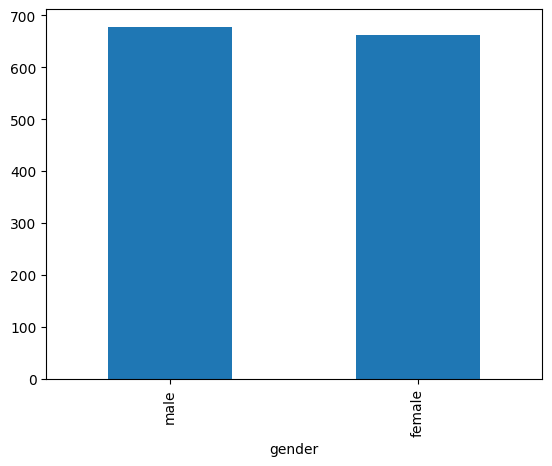

In [412]:
#Bar graph of gender
df["gender"].value_counts().plot(kind='bar')

<Axes: xlabel='diabetic'>

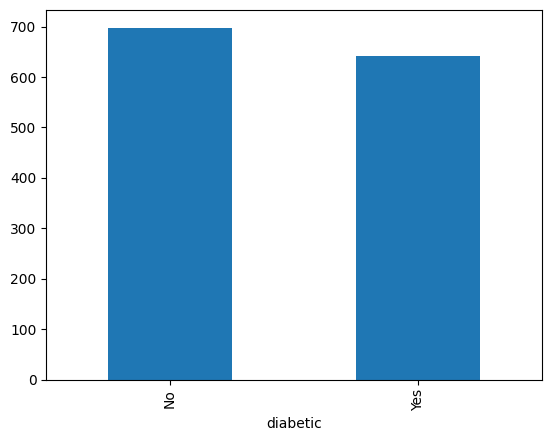

In [413]:
#Bar graph of diabetic
df["diabetic"].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

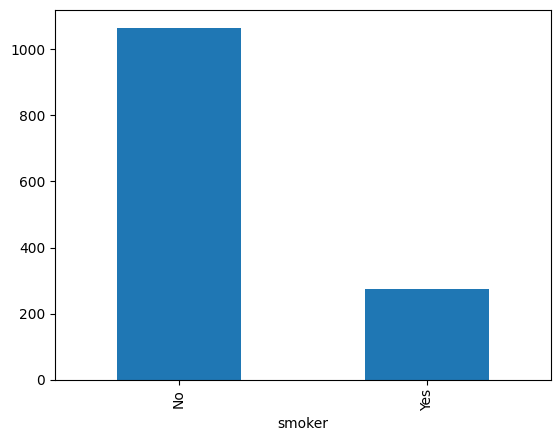

In [414]:
#Bar graph of smoker
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

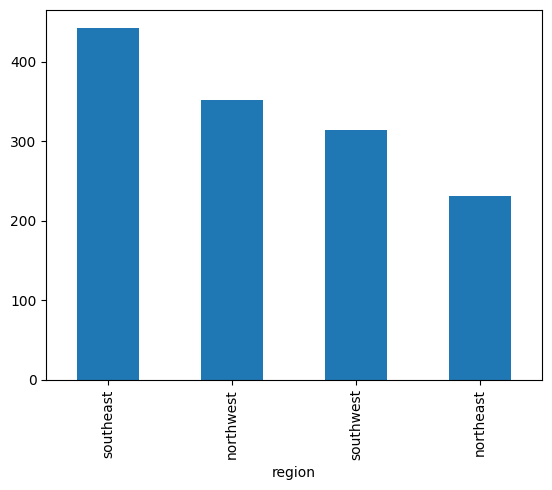

In [415]:
#Bar graph of region
df['region'].value_counts().plot(kind='bar')

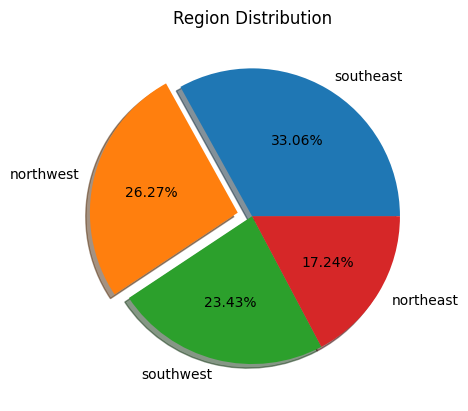

In [416]:
region_counts=df['region'].value_counts()
region_counts

#plot a pie chart
plt.pie(labels=region_counts.index,
        x=region_counts.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0,0.1,0,0))
plt.title("Region Distribution")
plt.show()

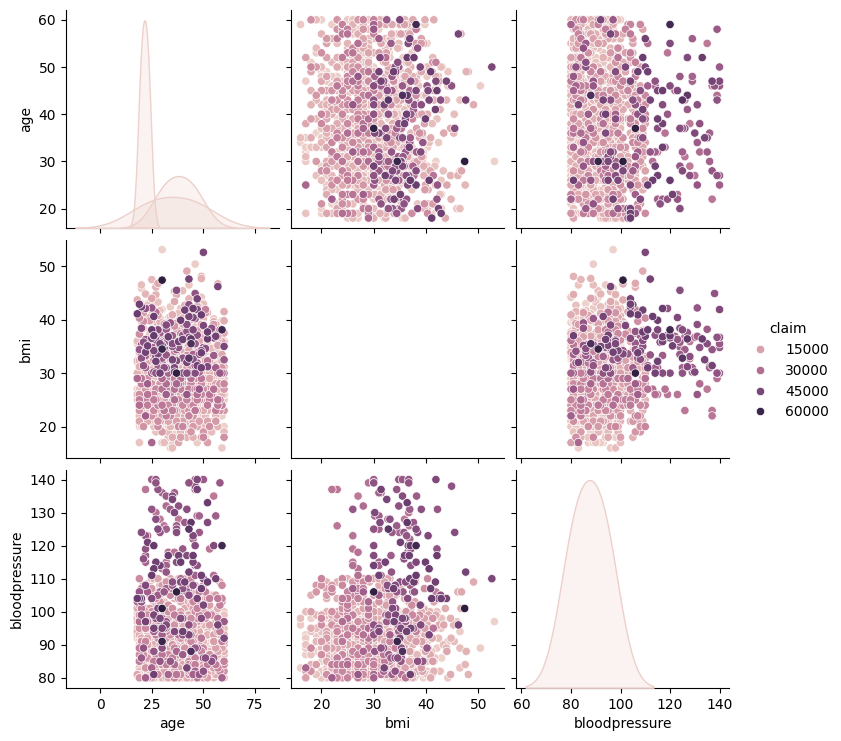

In [417]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the required columns
selected_columns = ["age", "bmi", "bloodpressure","claim"]
df_selected = df[selected_columns]

# Create a pairplot
sns.pairplot(df_selected, hue="claim", diag_kind="kde")  # 'hue' colors by claim, 'kde' for smooth distribution

# Show the plot
plt.show()

In [418]:
#Insurance claims for smokers & non-smokers
smoker_df=df.groupby("smoker")["claim"].mean().reset_index()
smoker_df

,smoker,claim
0,No,8421.121576
1,Yes,32050.231971


<Axes: xlabel='smoker'>

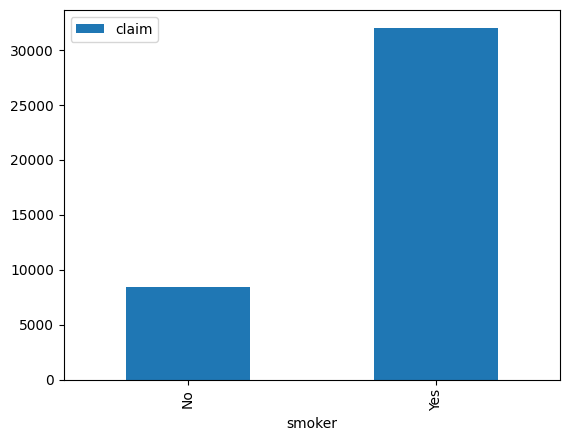

In [419]:
smoker_df.plot(kind='bar',x='smoker',y='claim')

In [420]:
##Insurance claims for gender(male & female)
gender_df =df.groupby("gender")["claim"].mean().reset_index()
gender_df

,gender,claim
0,female,12569.578897
1,male,13919.790457


<Axes: xlabel='gender'>

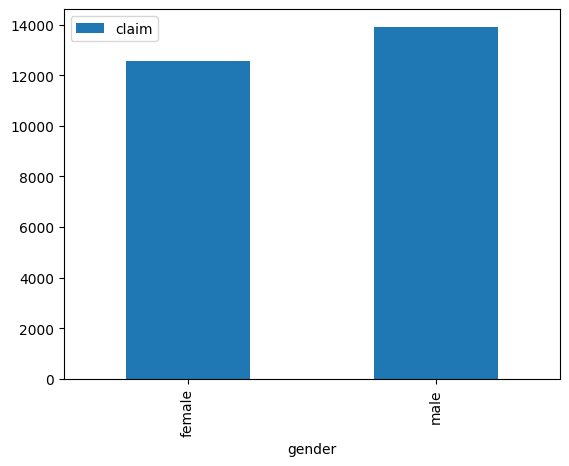

In [421]:
gender_df.plot(kind='bar', x='gender',y='claim')


In [422]:
#Insurance claims for diabetic category
diabetic_df=df.groupby("diabetic")["claim"].mean().reset_index()
diabetic_df

,diabetic,claim
0,No,13354.031991
1,Yes,13142.624346


<Axes: xlabel='diabetic'>

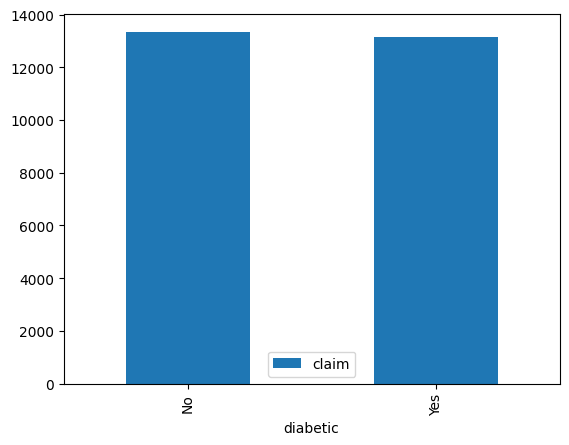

In [423]:
diabetic_df.plot(kind='bar',x='diabetic',y='claim')

In [424]:
##Insurance claims based on region
region_df =df.groupby("region")["claim"].mean().reset_index()
region_df

,region,claim
0,northeast,16889.044719
1,northwest,11583.299773
2,southeast,13058.522664
3,southwest,12723.129841


<Axes: xlabel='region'>

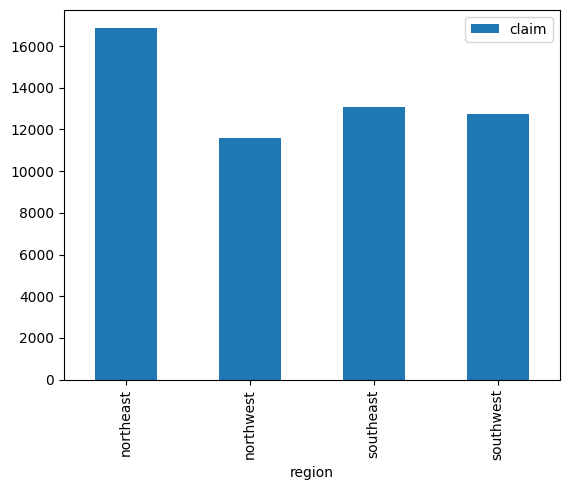

In [425]:
region_df.plot(kind='bar',x='region',y='claim')

#Feature Engineering

In [426]:
##Categorical columns
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['diabetic']=le.fit_transform(df['diabetic'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df


,index,patient_id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,1,23.13,91,1,0,0,2,1121.87
1,1,2,24.0,1,31.13,87,0,0,0,2,1131.51
2,2,3,19.0,1,33.30,82,1,0,0,2,1135.94
3,3,4,28.0,1,33.70,80,0,0,0,1,1136.40
4,4,5,23.0,1,34.10,100,0,0,0,1,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,0,35.50,88,1,0,1,1,55135.40
1336,1336,1337,59.0,0,38.10,120,0,1,1,0,58571.07
1337,1337,1338,30.0,1,34.50,91,1,3,1,1,60021.40
1338,1338,1339,37.0,1,30.00,106,0,0,1,2,62592.87


In [427]:
df = df.drop(columns=['index', 'patient_id'],axis=1)
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,1,23.13,91,1,0,0,2,1121.87
1,24.0,1,31.13,87,0,0,0,2,1131.51
2,19.0,1,33.30,82,1,0,0,2,1135.94
3,28.0,1,33.70,80,0,0,0,1,1136.40
4,23.0,1,34.10,100,0,0,0,1,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.0,0,35.50,88,1,0,1,1,55135.40
1336,59.0,0,38.10,120,0,1,1,0,58571.07
1337,30.0,1,34.50,91,1,3,1,1,60021.40
1338,37.0,1,30.00,106,0,0,1,2,62592.87


In [428]:
x=df.drop(columns=['claim'],axis=1)
y=df['claim']

In [429]:
from sklearn.model_selection import train_test_split

#first one
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


print(x_train.shape)
print(y_train.shape)

print("*"*20)

print(x_test.shape)
print(y_test.shape)


(1072, 8)
(1072,)
********************
(268, 8)
(268,)


In [430]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x['age']=sc.fit_transform(np.array(x['age']).reshape(-1,1))
x['bmi']=sc.fit_transform(np.array(x['bmi']).reshape(-1,1))
x['children']=sc.fit_transform(np.array(x['children']).reshape(-1,1))
x['bloodpressure']=sc.fit_transform(np.array(x['bloodpressure']).reshape(-1,1))
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,0.087083,1,-1.154911,-0.276233,1,-0.907376,0,2
1,-1.263511,1,0.116697,-0.626175,0,-0.907376,0,2
2,-1.713709,1,0.461621,-1.063604,1,-0.907376,0,2
3,-0.903353,1,0.525202,-1.238575,0,-0.907376,0,1
4,-1.353551,1,0.588782,0.511138,0,-0.907376,0,1
...,...,...,...,...,...,...,...,...
1335,0.537281,0,0.811314,-0.538690,1,-0.907376,1,1
1336,1.887875,0,1.224587,2.260852,0,-0.077421,1,0
1337,-0.723273,1,0.652363,-0.276233,1,1.582489,1,1
1338,-0.092996,1,-0.062917,1.036052,0,-0.907376,1,2


###Linear Regression Model:

In [431]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

##Cross Validation:

In [432]:
from sklearn.model_selection import cross_val_score, cross_validate
result= cross_validate(linear_reg_model, x, y, cv=5, return_train_score=True, scoring='r2')
result

{'fit_time': array([0.00457859, 0.00277805, 0.00350428, 0.00255799, 0.00289941]),
 'score_time': array([0.00322294, 0.00188756, 0.00210047, 0.00219345, 0.00175714]),
 'test_score': array([-90.73324467, -20.22366876,  -6.72623994, -11.08729483,
         -2.81783435]),
 'train_score': array([0.69849994, 0.69596212, 0.70883291, 0.7869053 , 0.35949151])}

In [433]:
train_acc= result['train_score'].mean()*100
print('Training Accuracy:',round(train_acc,2),'%')

print('*'*20)

test_acc= result['test_score'].mean()*100
print('Testing Accuracy:',round(test_acc,2),'%')


Training Accuracy: 64.99 %
********************
Testing Accuracy: -2631.77 %


In [434]:
# Import the desired model directly from the correct module:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models= []
models.append(("Linear Regression", LinearRegression()))
models.append(("Knn", KNeighborsRegressor()))
models.append(("Decision", DecisionTreeRegressor()))

for model in models:
  result= cross_validate(model[1], x, y, cv=5, return_train_score=True, scoring='r2')
  print(model[0])
  train_acc= round((result["train_score"].mean())*100, 2)
  test_acc= round((result["test_score"].mean())*100, 2)
  print(f'Train R2 score:{train_acc}')
  print(f'Test R2 score:{test_acc}')
  print('\n')

Linear Regression
Train R2 score:64.99
Test R2 score:-2631.77


Knn
Train R2 score:67.85
Test R2 score:-3131.2


Decision
Train R2 score:100.0
Test R2 score:-5464.05




In [435]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params={
    'n_estimators':[100, 200, 300], #number of trees in random forest
    'max_features':[None, 5, 10], #maximum number of levels in tree
    'min_samples_split':[2, 5, 10], #minimum number of samples required to split a node
    'min_samples_leaf':[1, 2, 4], #minimum number of samples required at each leaf node
    'bootstrap': [True, False] #method of selecting samples for training each tree
}

##Tuning using random search..
random_search = RandomizedSearchCV(
    param_distributions=params, #specify the parameter distributions to sample from
    estimator=RandomForestRegressor(), #specify the estimator to use
    cv=5, #number of cross-validation folds
    return_train_score=True, #include training scores in the results
    scoring='r2', #scoring metric to optimize
    n_jobs=-1 #use all available CPU cores for parallel computation
)


In [394]:
random_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [395]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'bootstrap': True}

In [396]:
random_search.cv_results_['mean_train_score'].mean()*100

91.425590018887

In [397]:
random_search.cv_results_['mean_test_score'].mean()*100

-2971.509713904398

In [398]:
# Ensure the RandomForestRegressor class is imported
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
RF = RandomForestRegressor(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=2,
                           max_depth=5,
                           bootstrap=True)
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [436]:
from sklearn.metrics import r2_score
predicted_train_data= RF.predict(x_train)
train_score= r2_score(y_true= y_train, y_pred=predicted_train_data)
predicted_test_data= RF.predict(x_test)
test_score= r2_score(y_true= y_test, y_pred=predicted_test_data)
print(f"R-squared (R^2) for Training Data Using Random Forest Regression:{round(train_score,2)*100} %")
print(f"R-squared (R^2) for Testing Data Using Random Forest Regression:{round(test_score,2)*100} %")

R-squared (R^2) for Training Data Using Random Forest Regression:83.0 %
R-squared (R^2) for Testing Data Using Random Forest Regression:85.0 %


#Create a Scatterplot with a Regression Line

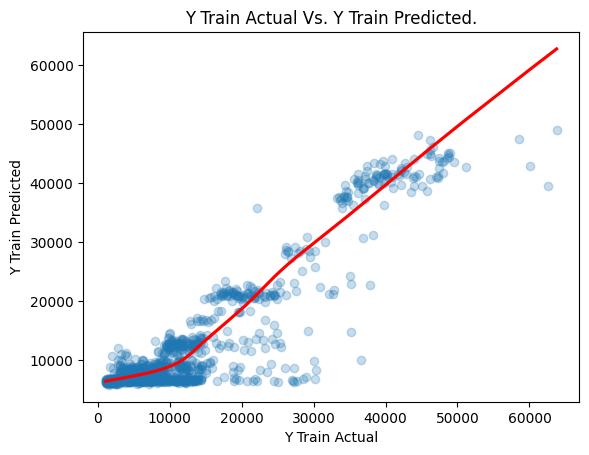

In [437]:
sns.regplot(x= y_train, y= predicted_train_data,
            lowess = True, ##Add a locally weighted scatterplot smoothing line
            line_kws= {'color': 'red'}, ##the color of the regression line
            scatter_kws= {'alpha':0.25}) ## the transparency of the scatter points

plt.title("Y Train Actual vs. Y Train Predicted.".title())
plt.xlabel("Y Train Actual")
plt.ylabel("Y Train Predicted")
plt.show()

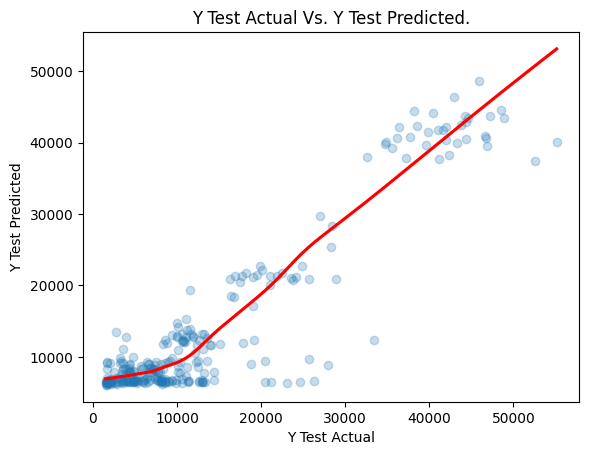

In [438]:
sns.regplot(x= y_test, y= predicted_test_data,
            lowess = True, ##Add a locally weighted scatterplot smoothing line
            line_kws= {'color': 'red'}, ##the color of the regression line
            scatter_kws= {'alpha':0.25}) ## the transparency of the scatter points

plt.title("Y Test Actual vs. Y Test Predicted.".title())
plt.xlabel("Y Test Actual")
plt.ylabel("Y Test Predicted")
plt.show()